In [3]:
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import accuracy_score
from sktime.classification.kernel_based import RocketClassifier
from sklearn.model_selection import train_test_split

folder1 = "C:/Users/mahrouaa/CS283_Project/DataPump/CS283/new_1m_binance"
folder2 = "C:/Users/mahrouaa/CS283_Project/DataPump/CS283/random1m"

def load_and_preprocess_data(folder_path, num_files=466):
    data_files = list(Path(folder_path).glob("*.csv"))[:num_files]
    dfs = [pd.read_csv(file, usecols=['High']).rename(columns={'High': f'High_{i+1}'}) 
           for i, file in enumerate(data_files)]
    combined_data = pd.concat(dfs, axis=1)

    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(combined_data)
    return pd.DataFrame(normalized_data).T

df1 = load_and_preprocess_data(folder1)
df2 = load_and_preprocess_data(folder2)

sample_df1 = df1.sample(n=100, random_state=1)
sample_df2 = df2.sample(n=100, random_state=1)

df1 = df1.drop(sample_df1.index)
df2 = df2.drop(sample_df2.index)

combined_df_train = pd.concat([df1, df2], ignore_index=True)
combined_df_test = pd.concat([sample_df1, sample_df2], ignore_index=True)

print(combined_df_train.shape)
print(combined_df_test.shape)


(732, 1000)
(200, 1000)


In [2]:
data_np_train = combined_df_train.to_numpy().reshape(-1, 1, 1000) 
labels_train = np.concatenate([np.ones(366), np.zeros(366)])

data_np_test = combined_df_test.to_numpy().reshape(-1, 1, 1000) 
labels_test = np.concatenate([np.ones(100), np.zeros(100)])

print(f"Shape of the data: {data_np_train.shape}")
print(f"Shape of the labels: {labels_train.shape}")

print(f"Shape of the data: {data_np_test.shape}")
print(f"Shape of the labels: {labels_test.shape}")

Shape of the data: (732, 1, 1000)
Shape of the labels: (732,)
Shape of the data: (200, 1, 1000)
Shape of the labels: (200,)


In [3]:
accuracies = []
from tqdm import tqdm

for _ in tqdm(range(10)):
    rocket = RocketClassifier(num_kernels=2000)
    rocket.fit(data_np_train, labels_train)
    y_pred = rocket.predict(data_np_test)

    accuracy = accuracy_score(labels_test, y_pred)
    accuracies.append(accuracy * 100)

accuracies



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [07:25<00:00, 44.59s/it]


[91.5, 90.0, 90.5, 91.0, 90.0, 90.5, 90.5, 89.5, 89.5, 90.0]

# GP Generated

In [4]:
# def generate_time_series(P_0, n, means_normal, std_dev_normal, means_pump, std_dev_pump, means_dump, std_dev_dump, pump_start, pump_duration, dump_duration):
#     means = np.full(n, means_normal)
#     std_devs = np.full(n, std_dev_normal)
#     pump_end = pump_start + pump_duration
#     dump_start = pump_end
#     dump_end = dump_start + dump_duration

#     means[pump_start:pump_end] = means_pump
#     std_devs[pump_start:pump_end] = std_dev_pump

#     means[dump_start:dump_end] = means_dump
#     std_devs[dump_start:dump_end] = std_dev_dump

#     P_t = np.zeros(n)
#     P_t[0] = P_0
#     for t in range(1, n):
#         e_t = np.random.normal(means[t], std_devs[t])
#         P_t[t] = P_t[t-1] + e_t
    
#     return P_t

# P_0 = 100
# n = 1000
# means_normal, std_dev_normal = 0.0, 0.01
# means_pump, std_dev_pump = 0.5, 0.1
# means_dump, std_dev_dump = -means_pump/3, std_dev_pump/2
# pump_start = 600
# pump_duration= 5
# dump_duration = 15

# generated_series = np.array([generate_time_series(P_0, n, means_normal, std_dev_normal, means_pump, std_dev_pump, means_dump, std_dev_dump, pump_start, pump_duration, dump_duration) for _ in range(366)])

# scaler = MinMaxScaler()

# df_generated = pd.DataFrame(generated_series)
# df_generated = pd.DataFrame(scaler.fit_transform(df_generated.T)).T

# combined_df_train = pd.concat([df_generated, df2], ignore_index=True)

# print(combined_df_train.shape)


(732, 1000)


In [5]:
# data_np_train = combined_df_train.to_numpy().reshape(-1, 1, 1000) 
# labels_train = np.concatenate([np.ones(366), np.zeros(366)])

# data_np_test = combined_df_test.to_numpy().reshape(-1, 1, 1000) 
# labels_test = np.concatenate([np.ones(100), np.zeros(100)])

# print(f"Shape of the data: {data_np_train.shape}")
# print(f"Shape of the labels: {labels_train.shape}")

# print(f"Shape of the data: {data_np_test.shape}")
# print(f"Shape of the labels: {labels_test.shape}")

Shape of the data: (732, 1, 1000)
Shape of the labels: (732,)
Shape of the data: (200, 1, 1000)
Shape of the labels: (200,)


In [6]:
# accuracies = []
# from tqdm import tqdm

# for _ in tqdm(range(10)):
#     rocket = RocketClassifier(num_kernels=2000)
#     rocket.fit(data_np_train, labels_train)
#     y_pred = rocket.predict(data_np_test)

#     accuracy = accuracy_score(labels_test, y_pred)
#     accuracies.append(accuracy * 100)

# accuracies

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [04:44<00:00, 28.48s/it]


[59.0, 59.0, 59.0, 58.5, 56.99999999999999, 59.5, 60.5, 62.0, 59.5, 60.0]

# GP Generated + Real

In [7]:
# def generate_time_series(P_0, n, means_normal, std_dev_normal, means_pump, std_dev_pump, means_dump, std_dev_dump, pump_start, pump_duration, dump_duration):
#     means = np.full(n, means_normal)
#     std_devs = np.full(n, std_dev_normal)
#     pump_end = pump_start + pump_duration
#     dump_start = pump_end
#     dump_end = dump_start + dump_duration

#     means[pump_start:pump_end] = means_pump
#     std_devs[pump_start:pump_end] = std_dev_pump

#     means[dump_start:dump_end] = means_dump
#     std_devs[dump_start:dump_end] = std_dev_dump

#     P_t = np.zeros(n)
#     P_t[0] = P_0
#     for t in range(1, n):
#         e_t = np.random.normal(means[t], std_devs[t])
#         P_t[t] = P_t[t-1] + e_t
    
#     return P_t

# P_0 = 100
# n = 1000
# means_normal, std_dev_normal = 0.0, 0.01
# means_pump, std_dev_pump = 0.5, 0.1
# means_dump, std_dev_dump = -means_pump/3, std_dev_pump/2
# pump_start = 600
# pump_duration= 5
# dump_duration = 15

# generated_series = np.array([generate_time_series(P_0, n, means_normal, std_dev_normal, means_pump, std_dev_pump, means_dump, std_dev_dump, pump_start, pump_duration, dump_duration) for _ in range(366)])
# df_generated = pd.DataFrame(generated_series)

# scaler = MinMaxScaler()
# df_generated = pd.DataFrame(scaler.fit_transform(df_generated.T)).T

# one_df_train = pd.concat([df_generated, df1], ignore_index=True)
# zero_df_train =  pd.concat([df2, df2], ignore_index=True)

# combined_df_train = pd.concat([one_df_train, zero_df_train], ignore_index=True)


# print(combined_df_train.shape)


(1464, 1000)


In [8]:
# data_np_train = combined_df_train.to_numpy().reshape(-1, 1, 1000) 
# labels_train = np.concatenate([np.ones(732), np.zeros(732)])

# data_np_test = combined_df_test.to_numpy().reshape(-1, 1, 1000) 
# labels_test = np.concatenate([np.ones(100), np.zeros(100)])

# print(f"Shape of the data: {data_np_train.shape}")
# print(f"Shape of the labels: {labels_train.shape}")

# print(f"Shape of the data: {data_np_test.shape}")
# print(f"Shape of the labels: {labels_test.shape}")

Shape of the data: (1464, 1, 1000)
Shape of the labels: (1464,)
Shape of the data: (200, 1, 1000)
Shape of the labels: (200,)


In [9]:
# accuracies = []
# from tqdm import tqdm

# for _ in tqdm(range(10)):
#     rocket = RocketClassifier(num_kernels=2000)
#     rocket.fit(data_np_train, labels_train)
#     y_pred = rocket.predict(data_np_test)

#     accuracy = accuracy_score(labels_test, y_pred)
#     accuracies.append(accuracy * 100)

# accuracies

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [08:50<00:00, 53.03s/it]


[91.0, 91.5, 91.5, 90.0, 91.0, 90.5, 90.5, 91.5, 90.0, 88.0]

# GAN Generated

cuda


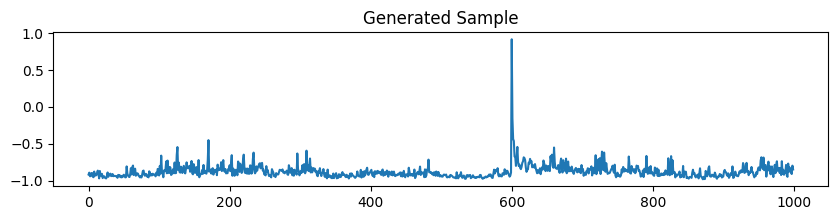

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.094044,0.122666,0.060555,0.052667,0.068504,0.073374,0.059675,0.081879,0.097877,0.057058,...,0.029748,0.017707,0.086172,0.033368,0.074813,0.048168,0.043341,0.036054,0.077175,0.051559
1,0.016700,0.032567,0.026404,0.021955,0.041875,0.038037,0.020331,0.020708,0.033474,0.026762,...,0.406159,0.394255,0.552421,0.485208,0.489779,0.489701,0.527592,0.545146,0.508724,0.584196
2,0.046672,0.064089,0.042560,0.029502,0.096535,0.057011,0.030057,0.031849,0.053137,0.040468,...,0.087462,0.078903,0.182552,0.114949,0.163156,0.148697,0.147515,0.095960,0.180291,0.169810
3,0.021957,0.026017,0.016437,0.016599,0.022913,0.028197,0.001798,0.007472,0.032583,0.013813,...,0.203111,0.217285,0.356479,0.326984,0.319438,0.329487,0.299053,0.329534,0.317059,0.335742
4,0.022564,0.036566,0.016798,0.007334,0.020340,0.020120,0.003347,0.006269,0.022646,0.013288,...,0.065926,0.061258,0.126850,0.090662,0.125959,0.105180,0.097626,0.080484,0.122867,0.104560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.128217,0.253221,0.256631,0.339096,0.322571,0.296384,0.160367,0.122367,0.253561,0.183202,...,0.245007,0.197743,0.365555,0.271724,0.336787,0.358447,0.287297,0.266796,0.284732,0.330695
362,0.007680,0.010978,0.006611,0.008655,0.006340,0.005520,0.002283,0.003108,0.007700,0.002910,...,0.169224,0.243175,0.260678,0.247645,0.248594,0.318203,0.292033,0.333691,0.266215,0.258719
363,0.047206,0.108362,0.081635,0.066357,0.072440,0.079213,0.032848,0.051480,0.059693,0.059584,...,0.238227,0.232403,0.309053,0.275856,0.308566,0.342993,0.308634,0.316491,0.295782,0.299548
364,0.051796,0.049593,0.051676,0.041349,0.043961,0.050762,0.087361,0.060359,0.099585,0.064171,...,0.068537,0.053279,0.142183,0.069235,0.133501,0.089354,0.095041,0.085124,0.158249,0.087871


In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


class Generator(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, output_size),
            nn.Tanh()
        )
        
    def forward(self, x):
        return self.fc(x)


def generate_sample(generator, input_size):

    generator.eval()
    with torch.no_grad():
        noise = torch.randn(1, input_size).to(device)
        generated_sample = generator(noise)
        
        plt.figure(figsize=(10, 2))
        plt.plot(generated_sample.cpu().numpy().reshape(-1))
        plt.title("Generated Sample")
        plt.show()


input_size = 100  
hidden_dim = 256
output_size = 1000 

G = Generator(input_size, hidden_dim, output_size).to(device)
G.load_state_dict(torch.load('C:/Users/mahrouaa/CS283_Project/DataPump/CS283/pumpGAN.pth'))

G.eval()

generate_sample(G, input_size)

import pandas as pd
import numpy as np

def generate_multiple_samples(generator, input_size, num_samples):
    generator.eval()
    with torch.no_grad():
        noise = torch.randn(num_samples, input_size).to(device)
        generated_samples = generator(noise)
        return generated_samples.cpu().numpy()

num_samples = 366
generated_data = generate_multiple_samples(G, input_size, num_samples)

df_generated = pd.DataFrame(generated_data)

scaler = MinMaxScaler()
df_generated = pd.DataFrame(scaler.fit_transform(df_generated.T)).T

df_generated


In [11]:
combined_df_train = pd.concat([df_generated, df2], ignore_index=True)

print(combined_df_train.shape)

data_np_train = combined_df_train.to_numpy().reshape(-1, 1, 1000) 
labels_train = np.concatenate([np.ones(366), np.zeros(366)])

data_np_test = combined_df_test.to_numpy().reshape(-1, 1, 1000) 
labels_test = np.concatenate([np.ones(100), np.zeros(100)])

print(f"Shape of the data: {data_np_train.shape}")
print(f"Shape of the labels: {labels_train.shape}")

print(f"Shape of the data: {data_np_test.shape}")
print(f"Shape of the labels: {labels_test.shape}")

(732, 1000)
Shape of the data: (732, 1, 1000)
Shape of the labels: (732,)
Shape of the data: (200, 1, 1000)
Shape of the labels: (200,)


In [12]:
accuracies = []
from tqdm import tqdm

for _ in tqdm(range(10)):
    rocket = RocketClassifier(num_kernels=2000)
    rocket.fit(data_np_train, labels_train)
    y_pred = rocket.predict(data_np_test)

    accuracy = accuracy_score(labels_test, y_pred)
    accuracies.append(accuracy * 100)

accuracies

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [05:03<00:00, 30.36s/it]


[60.5, 61.5, 64.0, 63.0, 61.0, 62.0, 62.5, 60.5, 62.0, 60.5]

# GAN Generated + Real

cuda


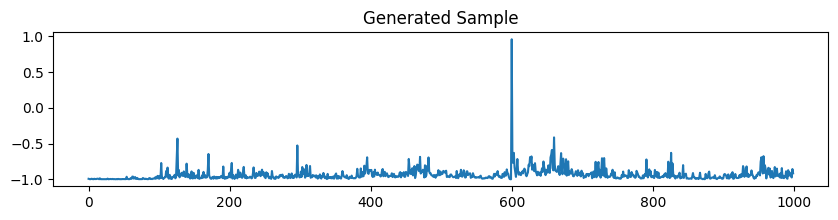

(1464, 1000)


In [13]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


class Generator(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, output_size),
            nn.Tanh()
        )
        
    def forward(self, x):
        return self.fc(x)


def generate_sample(generator, input_size):

    generator.eval()
    with torch.no_grad():
        noise = torch.randn(1, input_size).to(device)
        generated_sample = generator(noise)
        
        plt.figure(figsize=(10, 2))
        plt.plot(generated_sample.cpu().numpy().reshape(-1))
        plt.title("Generated Sample")
        plt.show()


input_size = 100  
hidden_dim = 256
output_size = 1000 

G = Generator(input_size, hidden_dim, output_size).to(device)
G.load_state_dict(torch.load('C:/Users/mahrouaa/CS283_Project/DataPump/CS283/pumpGAN.pth'))

G.eval()

generate_sample(G, input_size)

import pandas as pd
import numpy as np

def generate_multiple_samples(generator, input_size, num_samples):
    generator.eval()
    with torch.no_grad():
        noise = torch.randn(num_samples, input_size).to(device)
        generated_samples = generator(noise)
        return generated_samples.cpu().numpy()

num_samples = 366
generated_data = generate_multiple_samples(G, input_size, num_samples)

df_generated = pd.DataFrame(generated_data)

scaler = MinMaxScaler()
df_generated = pd.DataFrame(scaler.fit_transform(df_generated.T)).T

one_df_train = pd.concat([df_generated, df1], ignore_index=True)
zero_df_train =  pd.concat([df2, df2], ignore_index=True)

combined_df_train = pd.concat([one_df_train, zero_df_train], ignore_index=True)


print(combined_df_train.shape)


In [14]:
data_np_train = combined_df_train.to_numpy().reshape(-1, 1, 1000) 
labels_train = np.concatenate([np.ones(732), np.zeros(732)])

data_np_test = combined_df_test.to_numpy().reshape(-1, 1, 1000) 
labels_test = np.concatenate([np.ones(100), np.zeros(100)])

print(f"Shape of the data: {data_np_train.shape}")
print(f"Shape of the labels: {labels_train.shape}")

print(f"Shape of the data: {data_np_test.shape}")
print(f"Shape of the labels: {labels_test.shape}")

import numpy as np
from sklearn.metrics import accuracy_score
from sktime.classification.kernel_based import RocketClassifier
from sklearn.model_selection import train_test_split

accuracies = []
from tqdm import tqdm

for _ in tqdm(range(10)):
    rocket = RocketClassifier(num_kernels=2000)
    rocket.fit(data_np_train, labels_train)
    y_pred = rocket.predict(data_np_test)

    accuracy = accuracy_score(labels_test, y_pred)
    accuracies.append(accuracy * 100)

accuracies

Shape of the data: (1464, 1, 1000)
Shape of the labels: (1464,)
Shape of the data: (200, 1, 1000)
Shape of the labels: (200,)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [09:18<00:00, 55.81s/it]


[92.0, 91.5, 89.0, 91.5, 90.0, 89.5, 87.5, 90.5, 89.5, 89.5]

# VAE Generated

cuda


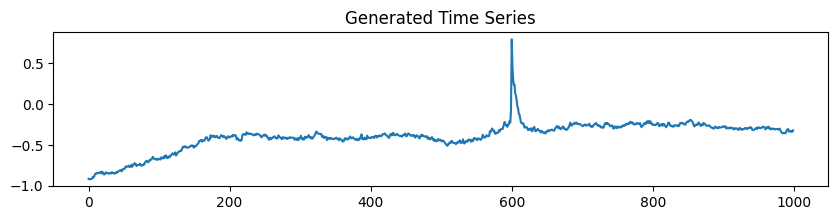

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.350282,0.356119,0.352675,0.359032,0.359626,0.361354,0.354605,0.356878,0.362836,0.363139,...,0.041869,0.037951,0.031329,0.034967,0.036179,0.037374,0.029867,0.035149,0.033881,0.031077
1,0.021360,0.026615,0.032478,0.030019,0.030406,0.032673,0.032960,0.030687,0.029674,0.027551,...,0.037866,0.038289,0.035565,0.037995,0.043305,0.042282,0.044429,0.049713,0.046744,0.044716
2,0.103428,0.107900,0.110802,0.111568,0.114722,0.116322,0.115328,0.112330,0.112373,0.108398,...,0.155896,0.155735,0.149643,0.156952,0.168749,0.159173,0.166547,0.163564,0.160675,0.160045
3,0.000000,0.013275,0.015123,0.013837,0.018755,0.022768,0.022435,0.014302,0.020226,0.013959,...,0.176564,0.177522,0.171156,0.182053,0.184466,0.189648,0.186637,0.194158,0.191919,0.197992
4,0.051257,0.049900,0.053314,0.049259,0.054626,0.056633,0.052073,0.050117,0.056668,0.054075,...,0.433834,0.431274,0.436978,0.436596,0.437008,0.433040,0.428657,0.431557,0.433062,0.436043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.000000,0.006291,0.007190,0.006847,0.004853,0.008362,0.010371,0.008286,0.010048,0.013465,...,0.227050,0.224123,0.221988,0.224162,0.229114,0.231252,0.233351,0.236713,0.238242,0.236271
362,0.155659,0.155313,0.159552,0.158348,0.158757,0.161960,0.156324,0.152466,0.155245,0.149734,...,0.329480,0.325606,0.331219,0.333838,0.335431,0.330966,0.331304,0.335055,0.336104,0.333038
363,0.000692,0.004942,0.004871,0.004953,0.005647,0.007761,0.004022,0.002126,0.003985,0.003826,...,0.141522,0.142301,0.141481,0.144732,0.146384,0.144362,0.145096,0.144875,0.145445,0.143431
364,0.211075,0.215739,0.218150,0.217401,0.217355,0.220288,0.222063,0.221958,0.223218,0.223347,...,0.011327,0.012208,0.012317,0.011336,0.014106,0.012371,0.010119,0.010243,0.006151,0.000889


In [15]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size, dropout_rate=0.5):
        super(VAE, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, latent_size * 2)  
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, input_size)
        )
        
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def forward(self, x):
        x = self.encoder(x)
        mu, logvar = torch.chunk(x, 2, dim=-1)
        
        z = self.reparameterize(mu, logvar)
        
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
latent_size=64

vae = VAE(input_size=1000, hidden_size=256, latent_size=64).to(device)
vae.load_state_dict(torch.load('C:/Users/mahrouaa/CS283_Project/DataPump/CS283/pumpVAE.pth'))
vae.eval()

def generate_sample(vae, latent_size):
    with torch.no_grad():
        z = torch.randn(1, latent_size).to(device)
        generated_time_series = vae.decoder(z)
        generated_time_series_cpu = generated_time_series.cpu()
        generated_time_series_np = generated_time_series_cpu.squeeze().numpy()

        plt.figure(figsize=(10, 2))
        plt.plot(generated_time_series_np)
        plt.title("Generated Time Series")
        plt.show()

generate_sample(vae, latent_size)


import pandas as pd
import numpy as np

def generate_multiple_samples(vae, latent_size, num_samples):
    with torch.no_grad():
        z = torch.randn(num_samples, latent_size).to(device)
        generated_time_series = vae.decoder(z)
        generated_time_series_cpu = generated_time_series.cpu()
        return generated_time_series_cpu.numpy()  

num_samples = 366
generated_data = generate_multiple_samples(vae, latent_size, num_samples)

df_generated = pd.DataFrame(generated_data)
scaler = MinMaxScaler()
df_generated = pd.DataFrame(scaler.fit_transform(df_generated.T)).T

df_generated


In [16]:
combined_df_train = pd.concat([df_generated, df2], ignore_index=True)

print(combined_df_train.shape)

data_np_train = combined_df_train.to_numpy().reshape(-1, 1, 1000) 
labels_train = np.concatenate([np.ones(366), np.zeros(366)])

data_np_test = combined_df_test.to_numpy().reshape(-1, 1, 1000) 
labels_test = np.concatenate([np.ones(100), np.zeros(100)])

print(f"Shape of the data: {data_np_train.shape}")
print(f"Shape of the labels: {labels_train.shape}")

print(f"Shape of the data: {data_np_test.shape}")
print(f"Shape of the labels: {labels_test.shape}")

(732, 1000)
Shape of the data: (732, 1, 1000)
Shape of the labels: (732,)
Shape of the data: (200, 1, 1000)
Shape of the labels: (200,)


In [17]:
import numpy as np
from sklearn.metrics import accuracy_score
from sktime.classification.kernel_based import RocketClassifier
from sklearn.model_selection import train_test_split

accuracies = []
from tqdm import tqdm

for _ in tqdm(range(10)):
    rocket = RocketClassifier(num_kernels=2000)
    rocket.fit(data_np_train, labels_train)
    y_pred = rocket.predict(data_np_test)

    accuracy = accuracy_score(labels_test, y_pred)
    accuracies.append(accuracy * 100)

accuracies

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [04:17<00:00, 25.75s/it]


[79.5, 80.0, 79.5, 80.5, 80.0, 79.5, 80.5, 81.5, 78.5, 78.0]

# VAE Generated + Real

cuda


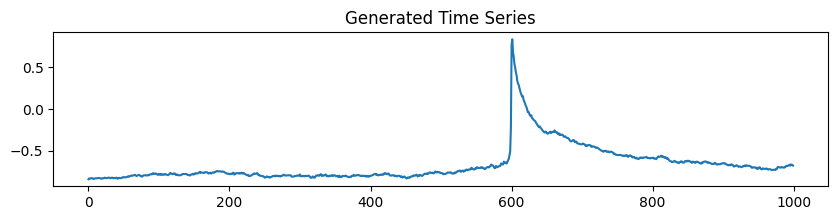

(1464, 1000)


In [18]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size, dropout_rate=0.5):
        super(VAE, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, latent_size * 2)  
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, input_size)
        )
        
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def forward(self, x):
        x = self.encoder(x)
        mu, logvar = torch.chunk(x, 2, dim=-1)
        
        z = self.reparameterize(mu, logvar)
        
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
latent_size=64

vae = VAE(input_size=1000, hidden_size=256, latent_size=64).to(device)
vae.load_state_dict(torch.load('C:/Users/mahrouaa/CS283_Project/DataPump/CS283/pumpVAE.pth'))
vae.eval()

def generate_sample(vae, latent_size):
    with torch.no_grad():
        z = torch.randn(1, latent_size).to(device)
        generated_time_series = vae.decoder(z)
        generated_time_series_cpu = generated_time_series.cpu()
        generated_time_series_np = generated_time_series_cpu.squeeze().numpy()

        plt.figure(figsize=(10, 2))
        plt.plot(generated_time_series_np)
        plt.title("Generated Time Series")
        plt.show()

# Generate a synthetic time series sample
generate_sample(vae, latent_size)


import pandas as pd
import numpy as np

def generate_multiple_samples(vae, latent_size, num_samples):
    with torch.no_grad():
        z = torch.randn(num_samples, latent_size).to(device)
        generated_time_series = vae.decoder(z)
        generated_time_series_cpu = generated_time_series.cpu()
        return generated_time_series_cpu.numpy()  

num_samples = 366
generated_data = generate_multiple_samples(vae, latent_size, num_samples)

df_generated = pd.DataFrame(generated_data)
scaler = MinMaxScaler()
df_generated = pd.DataFrame(scaler.fit_transform(df_generated.T)).T

one_df_train = pd.concat([df_generated, df1], ignore_index=True)
zero_df_train =  pd.concat([df2, df2], ignore_index=True)

combined_df_train = pd.concat([one_df_train, zero_df_train], ignore_index=True)


print(combined_df_train.shape)

In [19]:
data_np_train = combined_df_train.to_numpy().reshape(-1, 1, 1000) 
labels_train = np.concatenate([np.ones(732), np.zeros(732)])

data_np_test = combined_df_test.to_numpy().reshape(-1, 1, 1000) 
labels_test = np.concatenate([np.ones(100), np.zeros(100)])

print(f"Shape of the data: {data_np_train.shape}")
print(f"Shape of the labels: {labels_train.shape}")

print(f"Shape of the data: {data_np_test.shape}")
print(f"Shape of the labels: {labels_test.shape}")

import numpy as np
from sklearn.metrics import accuracy_score
from sktime.classification.kernel_based import RocketClassifier
from sklearn.model_selection import train_test_split

accuracies = []
from tqdm import tqdm

for _ in tqdm(range(10)):
    rocket = RocketClassifier(num_kernels=2000)
    rocket.fit(data_np_train, labels_train)
    y_pred = rocket.predict(data_np_test)

    accuracy = accuracy_score(labels_test, y_pred)
    accuracies.append(accuracy * 100)

accuracies

Shape of the data: (1464, 1, 1000)
Shape of the labels: (1464,)
Shape of the data: (200, 1, 1000)
Shape of the labels: (200,)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [09:33<00:00, 57.32s/it]


[91.0, 89.0, 92.5, 92.0, 89.5, 89.5, 90.5, 92.0, 90.5, 90.5]

# Diffusion Generated

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

file_path = "C:\\Users\\mahrouaa\\Downloads\\generated_time_series.csv"
data = pd.read_csv(file_path)

sampled_data = data.sample(366, random_state=42)

df_generated = sampled_data
new_column_names = [f"Gen_{i+1}" for i in range(df_generated.shape[1])]
df_generated.columns = new_column_names

scaler = MinMaxScaler()
df_generated = pd.DataFrame(scaler.fit_transform(df_generated.T)).T

df_generated


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.588967,0.583354,0.578511,0.580685,0.580014,0.692652,0.701085,0.705657,0.561440,0.514480,...,0.395400,0.392773,0.468228,0.393096,0.386740,0.491395,0.491731,0.496030,0.493897,0.526687
1,0.487671,0.472857,0.464632,0.475887,0.481150,0.480958,0.549482,0.533724,0.422776,0.336088,...,0.005434,0.010019,0.012957,0.008482,0.000000,0.027801,0.031478,0.032003,0.003441,0.009292
2,0.235339,0.237725,0.240378,0.230674,0.234449,0.234351,0.245730,0.279938,0.233239,0.136445,...,0.000000,0.000003,0.000000,0.000976,0.000000,0.037602,0.032754,0.043060,0.008336,0.000000
3,0.052151,0.055762,0.061030,0.067225,0.007557,0.022000,0.028977,0.019406,0.016817,0.014828,...,0.171472,0.188062,0.169020,0.154938,0.161591,0.282113,0.316726,0.299673,0.245472,0.227271
4,0.900940,0.809665,0.821497,0.809763,0.803007,0.963370,1.000000,0.988314,0.798683,0.750180,...,0.000000,0.002775,0.000000,0.000000,0.000000,0.072840,0.064069,0.078986,0.005242,0.000102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.894331,0.709324,0.719215,0.743179,0.754430,0.863652,0.863086,0.858241,0.679471,0.604857,...,0.007308,0.013515,0.010307,0.015593,0.000000,0.086108,0.081804,0.099177,0.030586,0.028331
362,0.658173,0.650228,0.651467,0.651449,0.638073,0.763442,0.798555,0.800603,0.649909,0.610715,...,0.463354,0.460891,0.532634,0.454976,0.448876,0.556789,0.558340,0.569491,0.565075,0.615159
363,0.286414,0.288789,0.283565,0.272141,0.242204,0.239544,0.319558,0.339114,0.260691,0.150120,...,0.001164,0.006986,0.000000,0.009454,0.000000,0.062085,0.060936,0.048429,0.011449,0.007293
364,0.685373,0.675986,0.665835,0.663768,0.661882,0.794922,0.862378,0.855167,0.702549,0.653300,...,0.286489,0.286526,0.287771,0.285395,0.283899,0.401029,0.403027,0.403415,0.378471,0.375574


In [4]:
combined_df_train = pd.concat([df_generated, df2], ignore_index=True)

print(combined_df_train.shape)

data_np_train = combined_df_train.to_numpy().reshape(-1, 1, 1000) 
labels_train = np.concatenate([np.ones(366), np.zeros(366)])

data_np_test = combined_df_test.to_numpy().reshape(-1, 1, 1000) 
labels_test = np.concatenate([np.ones(100), np.zeros(100)])

print(f"Shape of the data: {data_np_train.shape}")
print(f"Shape of the labels: {labels_train.shape}")

print(f"Shape of the data: {data_np_test.shape}")
print(f"Shape of the labels: {labels_test.shape}")

(732, 1000)
Shape of the data: (732, 1, 1000)
Shape of the labels: (732,)
Shape of the data: (200, 1, 1000)
Shape of the labels: (200,)


In [5]:
import numpy as np
from sklearn.metrics import accuracy_score
from sktime.classification.kernel_based import RocketClassifier
from sklearn.model_selection import train_test_split

accuracies = []
from tqdm import tqdm

for _ in tqdm(range(10)):
    rocket = RocketClassifier(num_kernels=2000)
    rocket.fit(data_np_train, labels_train)
    y_pred = rocket.predict(data_np_test)

    accuracy = accuracy_score(labels_test, y_pred)
    accuracies.append(accuracy * 100)

accuracies

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [04:25<00:00, 26.52s/it]


[51.0, 51.0, 50.0, 50.5, 51.0, 51.0, 51.0, 50.0, 51.5, 51.5]

# Diffusion Generated + Real

In [6]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

file_path = "C:\\Users\\mahrouaa\\Downloads\\generated_time_series.csv"
data = pd.read_csv(file_path)

sampled_data = data.sample(366, random_state=42)

df_generated = sampled_data
new_column_names = [f"Gen_{i+1}" for i in range(df_generated.shape[1])]
df_generated.columns = new_column_names

scaler = MinMaxScaler()
df_generated = pd.DataFrame(scaler.fit_transform(df_generated.T)).T

df_generated


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.588967,0.583354,0.578511,0.580685,0.580014,0.692652,0.701085,0.705657,0.561440,0.514480,...,0.395400,0.392773,0.468228,0.393096,0.386740,0.491395,0.491731,0.496030,0.493897,0.526687
1,0.487671,0.472857,0.464632,0.475887,0.481150,0.480958,0.549482,0.533724,0.422776,0.336088,...,0.005434,0.010019,0.012957,0.008482,0.000000,0.027801,0.031478,0.032003,0.003441,0.009292
2,0.235339,0.237725,0.240378,0.230674,0.234449,0.234351,0.245730,0.279938,0.233239,0.136445,...,0.000000,0.000003,0.000000,0.000976,0.000000,0.037602,0.032754,0.043060,0.008336,0.000000
3,0.052151,0.055762,0.061030,0.067225,0.007557,0.022000,0.028977,0.019406,0.016817,0.014828,...,0.171472,0.188062,0.169020,0.154938,0.161591,0.282113,0.316726,0.299673,0.245472,0.227271
4,0.900940,0.809665,0.821497,0.809763,0.803007,0.963370,1.000000,0.988314,0.798683,0.750180,...,0.000000,0.002775,0.000000,0.000000,0.000000,0.072840,0.064069,0.078986,0.005242,0.000102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.894331,0.709324,0.719215,0.743179,0.754430,0.863652,0.863086,0.858241,0.679471,0.604857,...,0.007308,0.013515,0.010307,0.015593,0.000000,0.086108,0.081804,0.099177,0.030586,0.028331
362,0.658173,0.650228,0.651467,0.651449,0.638073,0.763442,0.798555,0.800603,0.649909,0.610715,...,0.463354,0.460891,0.532634,0.454976,0.448876,0.556789,0.558340,0.569491,0.565075,0.615159
363,0.286414,0.288789,0.283565,0.272141,0.242204,0.239544,0.319558,0.339114,0.260691,0.150120,...,0.001164,0.006986,0.000000,0.009454,0.000000,0.062085,0.060936,0.048429,0.011449,0.007293
364,0.685373,0.675986,0.665835,0.663768,0.661882,0.794922,0.862378,0.855167,0.702549,0.653300,...,0.286489,0.286526,0.287771,0.285395,0.283899,0.401029,0.403027,0.403415,0.378471,0.375574


In [7]:
one_df_train = pd.concat([df_generated, df1], ignore_index=True)
zero_df_train =  pd.concat([df2, df2], ignore_index=True)

combined_df_train = pd.concat([one_df_train, zero_df_train], ignore_index=True)


print(combined_df_train.shape)

(1464, 1000)


In [8]:
data_np_train = combined_df_train.to_numpy().reshape(-1, 1, 1000) 
labels_train = np.concatenate([np.ones(732), np.zeros(732)])

data_np_test = combined_df_test.to_numpy().reshape(-1, 1, 1000) 
labels_test = np.concatenate([np.ones(100), np.zeros(100)])

print(f"Shape of the data: {data_np_train.shape}")
print(f"Shape of the labels: {labels_train.shape}")

print(f"Shape of the data: {data_np_test.shape}")
print(f"Shape of the labels: {labels_test.shape}")

import numpy as np
from sklearn.metrics import accuracy_score
from sktime.classification.kernel_based import RocketClassifier
from sklearn.model_selection import train_test_split

accuracies = []
from tqdm import tqdm

for _ in tqdm(range(10)):
    rocket = RocketClassifier(num_kernels=2000)
    rocket.fit(data_np_train, labels_train)
    y_pred = rocket.predict(data_np_test)

    accuracy = accuracy_score(labels_test, y_pred)
    accuracies.append(accuracy * 100)

accuracies

Shape of the data: (1464, 1, 1000)
Shape of the labels: (1464,)
Shape of the data: (200, 1, 1000)
Shape of the labels: (200,)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [08:31<00:00, 51.19s/it]


[89.5, 90.0, 90.0, 90.5, 88.5, 89.5, 89.0, 89.5, 91.0, 92.5]

# GP Generated

In [23]:
import os
import pandas as pd
import numpy as np

folder_path = r"C:\Users\mahrouaa\CS283_Project\DataPump\CS283\new_1m_binance"

returns_list = []

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, usecols=['returns'])
        returns_list.append(df)

all_returns_df = pd.concat(returns_list, axis=1)
all_returns_df = all_returns_df.drop(all_returns_df.index[0])
all_returns_df

,returns,returns,returns,returns,returns,returns,returns,returns,returns,returns,...,returns,returns,returns,returns,returns,returns,returns,returns,returns,returns
1,0.000000,0.242718,0.000000,0.000000,0.168350,0.0,0.724638,0.0,0.000000,0.000000,...,0.037383,0.000000,0.000000,0.669176,0.420673,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.447227,-0.242131,0.000000,0.000000,0.000000,0.0,-0.719424,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.059844,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.178094,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.037369,-0.340909,0.000000,0.000000,0.000000,0.000000,0.000000,0.269542,0.000000,0.229885
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.037355,0.000000,0.000000,0.000000,0.000000,0.000000,-0.333333,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.255102,-0.096038,0.0,-0.724638,0.0,0.000000,0.419580,...,0.037341,0.000000,0.036576,0.000000,0.000000,0.000000,0.000000,0.268817,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.291545,0.000000,0.000000,-0.402748,0.0,0.000000,0.0,0.000000,0.247525,...,0.000000,0.000000,0.773286,0.000000,-0.107009,0.800000,0.322581,0.000000,0.000000,0.740741
996,0.000000,0.000000,0.234192,0.000000,-0.071361,0.0,-0.709220,0.0,-0.094967,0.493827,...,-0.036430,0.000000,-0.034880,0.000000,-0.053562,-0.595238,0.321543,-0.231481,0.182482,-0.735294
997,0.000000,0.000000,0.000000,0.000000,0.047608,0.0,0.000000,0.0,0.000000,0.368550,...,0.036443,0.000000,0.000000,0.000000,-0.053591,-0.598802,0.000000,0.000000,0.000000,0.000000
998,0.000000,0.290698,0.000000,0.000000,-0.047585,0.0,0.000000,0.0,0.000000,0.244798,...,0.000000,0.000000,0.000000,0.000000,-0.053619,1.204819,-0.320513,0.000000,-0.182149,0.493827


In [24]:
mean_vector = all_returns_df.mean(axis=1)
stdev_vector = all_returns_df.std(axis=1)

df_generated = pd.DataFrame()

initial_price=100
num_series=366

for series_idx in range(num_series):
    return_vector = np.random.normal(mean_vector, stdev_vector)
    price_vector = [initial_price]
    
    for ret in return_vector:
        new_price = price_vector[-1] * (1 + (ret / 100))
        price_vector.append(new_price)
    
    df_generated[f'Series_{series_idx+1}'] = price_vector

df_generated=df_generated.T
df_generated

C:\Users\mahrouaa\AppData\Local\Temp\ipykernel_24544\3735104783.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_generated[f'Series_{series_idx+1}'] = price_vector
C:\Users\mahrouaa\AppData\Local\Temp\ipykernel_24544\3735104783.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_generated[f'Series_{series_idx+1}'] = price_vector
C:\Users\mahrouaa\AppData\Local\Temp\ipykernel_24544\3735104783.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whi

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Series_1,100.0,100.255623,100.029686,100.260855,99.735351,99.769075,98.646948,99.329759,99.177045,98.955665,...,111.300930,112.154721,110.994779,110.791091,110.481022,111.138526,111.483229,111.915555,110.987482,111.168371
Series_2,100.0,100.033646,100.577902,100.900367,101.105647,100.895372,101.345580,102.349795,102.716246,102.986107,...,157.772763,158.342726,158.508150,157.425127,158.284926,157.212913,156.573930,156.012375,156.397148,155.840885
Series_3,100.0,99.735207,99.611365,99.737284,99.249978,99.055585,99.172164,99.058297,99.559031,100.048389,...,173.936283,174.397334,173.619210,173.950178,173.090892,173.937976,173.934006,173.915114,175.179879,173.952638
Series_4,100.0,99.155771,99.010010,98.720354,98.333743,98.415925,98.731189,98.809569,99.403653,99.316334,...,50.538256,50.667149,50.843692,50.336015,50.011385,50.519967,50.336719,50.650141,50.744449,50.771064
Series_5,100.0,99.449348,99.754353,99.944771,99.216332,99.210382,99.211997,98.447731,98.481384,98.663542,...,117.369237,117.553946,118.308839,117.437365,117.916730,119.310512,119.891373,119.929685,119.895530,120.148195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Series_362,100.0,99.912173,99.994403,99.925244,99.667121,99.546412,99.438333,98.757848,98.477566,98.320662,...,-44.028568,-43.901503,-43.971970,-43.856903,-43.799023,-43.707676,-43.911381,-43.949926,-43.851343,-43.582720
Series_363,100.0,100.197108,100.119235,100.461971,100.739067,100.609926,101.210246,101.775506,102.535625,103.239867,...,50.272783,50.395284,50.091372,50.159508,50.378779,50.548040,51.079422,50.645993,50.863960,50.711396
Series_364,100.0,99.746141,100.075268,100.122048,100.310008,100.077195,100.972968,100.264860,99.865576,99.594911,...,29.212138,29.358935,29.310411,29.460637,29.542684,29.355565,29.459715,29.417990,29.374957,29.270246
Series_365,100.0,99.516421,99.776057,100.128201,99.990682,100.119571,100.041835,100.155971,100.393962,100.137076,...,49.043658,49.221793,49.001235,49.167576,49.051539,48.662911,48.731094,48.454194,48.744576,48.622106


In [25]:
df_generated = pd.DataFrame(scaler.fit_transform(df_generated.T)).T

combined_df_train = pd.concat([df_generated, df2], ignore_index=True)

print(combined_df_train.shape)

(732, 1000)


In [26]:
data_np_train = combined_df_train.to_numpy().reshape(-1, 1, 1000) 
labels_train = np.concatenate([np.ones(366), np.zeros(366)])

data_np_test = combined_df_test.to_numpy().reshape(-1, 1, 1000) 
labels_test = np.concatenate([np.ones(100), np.zeros(100)])

print(f"Shape of the data: {data_np_train.shape}")
print(f"Shape of the labels: {labels_train.shape}")

print(f"Shape of the data: {data_np_test.shape}")
print(f"Shape of the labels: {labels_test.shape}")

Shape of the data: (732, 1, 1000)
Shape of the labels: (732,)
Shape of the data: (200, 1, 1000)
Shape of the labels: (200,)


In [27]:
accuracies = []
from tqdm import tqdm

for _ in tqdm(range(10)):
    rocket = RocketClassifier(num_kernels=2000)
    rocket.fit(data_np_train, labels_train)
    y_pred = rocket.predict(data_np_test)

    accuracy = accuracy_score(labels_test, y_pred)
    accuracies.append(accuracy * 100)

accuracies

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [04:35<00:00, 27.56s/it]


[83.0, 82.5, 80.5, 80.5, 82.5, 81.5, 80.5, 80.0, 82.0, 81.0]

# GP Generated + Real

In [28]:
mean_vector = all_returns_df.mean(axis=1)
stdev_vector = all_returns_df.std(axis=1)

df_generated = pd.DataFrame()

initial_price=100
num_series=366

for series_idx in range(num_series):
    return_vector = np.random.normal(mean_vector, stdev_vector)
    price_vector = [initial_price]
    
    for ret in return_vector:
        new_price = price_vector[-1] * (1 + (ret / 100))
        price_vector.append(new_price)
    
    df_generated[f'Series_{series_idx+1}'] = price_vector

df_generated=df_generated.T
one_df_train = pd.concat([df_generated, df1], ignore_index=True)
zero_df_train =  pd.concat([df2, df2], ignore_index=True)

combined_df_train = pd.concat([one_df_train, zero_df_train], ignore_index=True)


C:\Users\mahrouaa\AppData\Local\Temp\ipykernel_24544\346945148.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_generated[f'Series_{series_idx+1}'] = price_vector
C:\Users\mahrouaa\AppData\Local\Temp\ipykernel_24544\346945148.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_generated[f'Series_{series_idx+1}'] = price_vector
C:\Users\mahrouaa\AppData\Local\Temp\ipykernel_24544\346945148.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

In [29]:
print(combined_df_train.shape)


(1464, 1000)


In [30]:
data_np_train = combined_df_train.to_numpy().reshape(-1, 1, 1000) 
labels_train = np.concatenate([np.ones(732), np.zeros(732)])

data_np_test = combined_df_test.to_numpy().reshape(-1, 1, 1000) 
labels_test = np.concatenate([np.ones(100), np.zeros(100)])

print(f"Shape of the data: {data_np_train.shape}")
print(f"Shape of the labels: {labels_train.shape}")

print(f"Shape of the data: {data_np_test.shape}")
print(f"Shape of the labels: {labels_test.shape}")

Shape of the data: (1464, 1, 1000)
Shape of the labels: (1464,)
Shape of the data: (200, 1, 1000)
Shape of the labels: (200,)


In [31]:
accuracies = []
from tqdm import tqdm

for _ in tqdm(range(10)):
    rocket = RocketClassifier(num_kernels=2000)
    rocket.fit(data_np_train, labels_train)
    y_pred = rocket.predict(data_np_test)

    accuracy = accuracy_score(labels_test, y_pred)
    accuracies.append(accuracy * 100)

accuracies

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [08:58<00:00, 53.80s/it]


[91.0, 91.5, 91.0, 91.5, 92.0, 91.5, 90.0, 90.5, 91.5, 91.5]